In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
pdf = sns.load_dataset('penguins')
pdf.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [3]:
pdf.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

In [4]:
pdf.dtypes[pdf.dtypes=='object']

species    object
island     object
sex        object
dtype: object

In [5]:
strcols = pdf.dtypes[pdf.dtypes == 'object'].index.tolist()
strcols

['species', 'island', 'sex']

In [6]:
numcols = pdf.dtypes[pdf.dtypes != 'object'].index.tolist()
numcols

['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

## find missing entries in each column

In [7]:
pdf.isna().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [8]:
pdf.shape[0]

344

In [9]:
100*pdf.isna().sum()/pdf.shape[0]

species              0.000000
island               0.000000
bill_length_mm       0.581395
bill_depth_mm        0.581395
flipper_length_mm    0.581395
body_mass_g          0.581395
sex                  3.197674
dtype: float64

-- Fill all missing values

In [10]:
for col in numcols:
  pdf[col]= pdf[col].fillna(pdf[col].mean())

In [11]:
100*pdf.isna().sum()/pdf.shape[0]

species              0.000000
island               0.000000
bill_length_mm       0.000000
bill_depth_mm        0.000000
flipper_length_mm    0.000000
body_mass_g          0.000000
sex                  3.197674
dtype: float64

In [12]:
pdf2 = pdf[:]
pdf2.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.10000,18.70000,181.000000,3750.000000,Male
1,Adelie,Torgersen,39.50000,17.40000,186.000000,3800.000000,Female
2,Adelie,Torgersen,40.30000,18.00000,195.000000,3250.000000,Female
3,Adelie,Torgersen,43.92193,17.15117,200.915205,4201.754386,NaN
4,Adelie,Torgersen,36.70000,19.30000,193.000000,3450.000000,Female


In [13]:
pdf2.sex.value_counts()

Male      168
Female    165
Name: sex, dtype: int64

In [14]:
 pdf2.sex.mode().values[0]

'Male'

In [15]:
pdf2.sex= pdf2.sex.fillna(pdf2.sex.mode().values[0])


In [16]:
100*pdf2.isna().sum()/pdf2.shape[0]

species              0.0
island               0.0
bill_length_mm       0.0
bill_depth_mm        0.0
flipper_length_mm    0.0
body_mass_g          0.0
sex                  0.0
dtype: float64

In [17]:
pdf2.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.10000,18.70000,181.000000,3750.000000,Male
1,Adelie,Torgersen,39.50000,17.40000,186.000000,3800.000000,Female
2,Adelie,Torgersen,40.30000,18.00000,195.000000,3250.000000,Female
3,Adelie,Torgersen,43.92193,17.15117,200.915205,4201.754386,Male
4,Adelie,Torgersen,36.70000,19.30000,193.000000,3450.000000,Female


## convert Categorical varibales to numericals 


|species|oldvalue| |A|B|C||
|--|--|--|--|--|--|--|
|A|0||1|0|0|A present|
|B|1||0|1|0|B present|
|C|2||0|0|1|C present|
|B|1||0|1|0|B present|
|B|1||0|1|0|B present|
|A|0||1|0|0|A present|
|C|2||0|0|1|C present|
|A|0||1|0|0|A present|


-- Dropping first category

|species|oldvalue| ||B|C||
|--|--|--|--|--|--|--|
|A|0|||0|0|A present|
|B|1|||1|0|B present|
|C|2|||0|1|C present|
|B|1|||1|0|B present|
|B|1|||1|0|B present|
|A|0|||0|0|A present|
|C|2|||0|1|C present|
|A|0|||0|0|A present|


In [18]:
pdf2.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.10000,18.70000,181.000000,3750.000000,Male
1,Adelie,Torgersen,39.50000,17.40000,186.000000,3800.000000,Female
2,Adelie,Torgersen,40.30000,18.00000,195.000000,3250.000000,Female
3,Adelie,Torgersen,43.92193,17.15117,200.915205,4201.754386,Male
4,Adelie,Torgersen,36.70000,19.30000,193.000000,3450.000000,Female


In [19]:
np.random.choice(['sun','mon','tue','wed','thu','fri','sat'])

'wed'

In [20]:
pdf2.species.unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [21]:
spcdf = pd.get_dummies(pdf2.species, prefix='spc')

In [22]:
isldf = pd.get_dummies(pdf2.island, prefix='isl')

In [23]:
gendf = pd.get_dummies(pdf2.sex, prefix='gen')

In [24]:
pdf3 = pd.concat([pdf2, spcdf,isldf,gendf], axis=1)

In [25]:
pdf3.drop(columns=['species','island','sex'], axis=1, inplace=True)
pdf3.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,spc_Adelie,spc_Chinstrap,spc_Gentoo,isl_Biscoe,isl_Dream,isl_Torgersen,gen_Female,gen_Male
0,39.10000,18.70000,181.000000,3750.000000,1,0,0,0,0,1,0,1
1,39.50000,17.40000,186.000000,3800.000000,1,0,0,0,0,1,1,0
2,40.30000,18.00000,195.000000,3250.000000,1,0,0,0,0,1,1,0
3,43.92193,17.15117,200.915205,4201.754386,1,0,0,0,0,1,0,1
4,36.70000,19.30000,193.000000,3450.000000,1,0,0,0,0,1,1,0


In [26]:
pdf3.spc_Adelie.value_counts()

0    192
1    152
Name: spc_Adelie, dtype: int64

In [27]:
pdf3.isna().sum()

bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
spc_Adelie           0
spc_Chinstrap        0
spc_Gentoo           0
isl_Biscoe           0
isl_Dream            0
isl_Torgersen        0
gen_Female           0
gen_Male             0
dtype: int64

-- Extract Train and test dataset

In [28]:
X= pdf3.drop('body_mass_g',axis=1)
y= pdf3.body_mass_g.values.reshape(-1,1)

In [29]:
X.shape,y.shape

((344, 11), (344, 1))

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train,X_test,y_train,y_test = train_test_split(
    X,y,test_size=0.25, random_state=1234
)

In [32]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((258, 11), (86, 11), (258, 1), (86, 1))

## Linear Regression Model

In [33]:
from sklearn.linear_model import LinearRegression

In [34]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((258, 11), (258, 1), (86, 11), (86, 1))

In [35]:
lr_model = LinearRegression()
lr_model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [36]:
c = lr_model.intercept_

In [37]:
m = lr_model.coef_

In [38]:
c,m

(array([-1225.82353976]),
 array([[  25.91530389,   81.98434084,   13.85889586, -228.9665075 ,
         -556.62492673,  785.59143423,   35.95041183,   -6.09683395,
          -29.85357789, -161.93917717,  161.93917717]]))

In [41]:
X_train.columns

Index(['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'spc_Adelie',
       'spc_Chinstrap', 'spc_Gentoo', 'isl_Biscoe', 'isl_Dream',
       'isl_Torgersen', 'gen_Female', 'gen_Male'],
      dtype='object')

In [42]:
dfcoeff = pd.DataFrame({'col':X_train.columns,'coeff':m[0]})
dfcoeff

,col,coeff
0,bill_length_mm,25.915304
1,bill_depth_mm,81.984341
2,flipper_length_mm,13.858896
3,spc_Adelie,-228.966507
4,spc_Chinstrap,-556.624927
5,spc_Gentoo,785.591434
6,isl_Biscoe,35.950412
7,isl_Dream,-6.096834
8,isl_Torgersen,-29.853578
9,gen_Female,-161.939177


In [43]:
dfcoeff['imp']=  dfcoeff.coeff/dfcoeff.coeff.abs().max()
dfcoeff

,col,coeff,imp
0,bill_length_mm,25.915304,0.032988
1,bill_depth_mm,81.984341,0.104360
2,flipper_length_mm,13.858896,0.017641
3,spc_Adelie,-228.966507,-0.291457
4,spc_Chinstrap,-556.624927,-0.708543
5,spc_Gentoo,785.591434,1.000000
6,isl_Biscoe,35.950412,0.045762
7,isl_Dream,-6.096834,-0.007761
8,isl_Torgersen,-29.853578,-0.038001
9,gen_Female,-161.939177,-0.206137


In [44]:
dfcoeff['imp']=  np.sqrt((dfcoeff.coeff/dfcoeff.coeff.abs().max())**2)
dfcoeff.sort_values('imp',ascending=False)

,col,coeff,imp
5,spc_Gentoo,785.591434,1.000000
4,spc_Chinstrap,-556.624927,0.708543
3,spc_Adelie,-228.966507,0.291457
10,gen_Male,161.939177,0.206137
9,gen_Female,-161.939177,0.206137
1,bill_depth_mm,81.984341,0.104360
6,isl_Biscoe,35.950412,0.045762
8,isl_Torgersen,-29.853578,0.038001
0,bill_length_mm,25.915304,0.032988
2,flipper_length_mm,13.858896,0.017641


In [46]:
y_learnt_mf = lr_model.predict(X_train)
y_learnt_mf[:5]

array([[3653.34524979],
       [4798.65403491],
       [5239.32718657],
       [3448.5821616 ],
       [3341.32666373]])

In [47]:
y_train[:5]

array([[3800.],
       [4850.],
       [5300.],
       [3400.],
       [3700.]])

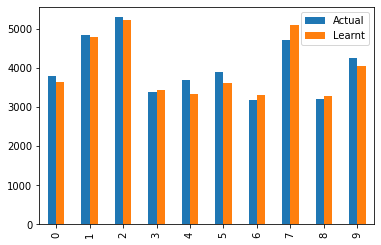

In [48]:
df22 = pd.DataFrame({'Actual': y_train[:,0],
                     'Learnt': y_learnt_mf[:,0]})
df22.head(10).plot(kind='bar')

In [49]:
from sklearn.metrics import mean_squared_error as mse

In [50]:
mse_train_mf = mse(y_train , y_learnt_mf)
mse_train_mf

79310.48056213827

In [51]:
y_pred = lr_model.predict(X_test)
y_pred[:5]

array([[3314.50731546],
       [5341.6684005 ],
       [4066.34004363],
       [3978.49293668],
       [3482.11132601]])

In [52]:
mse_test_mf = mse(y_test,y_pred)
mse_test_mf

114315.35770517406

# R2 score

In [53]:
mse_base = 802.2336451400918**2
mse_base

643578.8213947586

In [54]:
1-(mse_test_mf/mse_base)

0.8223755134492605

In [55]:
1-(rmse_test_sf/rmse_test_base)

NameError: ignored

In [56]:
from sklearn.metrics import r2_score

In [57]:
r2_score_mf = r2_score(y_test,y_pred)
r2_score_mf

0.8223754690254201